In [ ]:
import pandas as pd

df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


# Customer Behavior Analysis – Alfido Tech

This project analyzes customer transaction data to identify purchasing patterns,
customer segments, and churn risks. The goal is to provide actionable insights
to improve customer engagement and retention.


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
df.describe()


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.isnull().sum()


,0
customer_id,0
purchase_date,0
product_category,0
product_price,0
quantity,0
total_purchase_amount,0
payment_method,0
customer_age,0
returns,47596
customer_name,0


In [ ]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['revenue'] = df['product_price'] * df['quantity']
df['month'] = df['purchase_date'].dt.month


In [ ]:
import datetime as dt

snapshot_date = df['purchase_date'].max() + dt.timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'purchase_date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'revenue': 'sum'
})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()


,recency,frequency,monetary
customer_id,,,
1,58,1,845
2,299,3,1070
3,89,8,5041
4,127,4,1433
5,171,8,7881


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,recency,frequency,monetary,cluster
customer_id,,,,
1,58,1,845,1
2,299,3,1070,1
3,89,8,5041,2
4,127,4,1433,1
5,171,8,7881,2


<Axes: title={'center': 'Customer Segments'}, xlabel='cluster'>

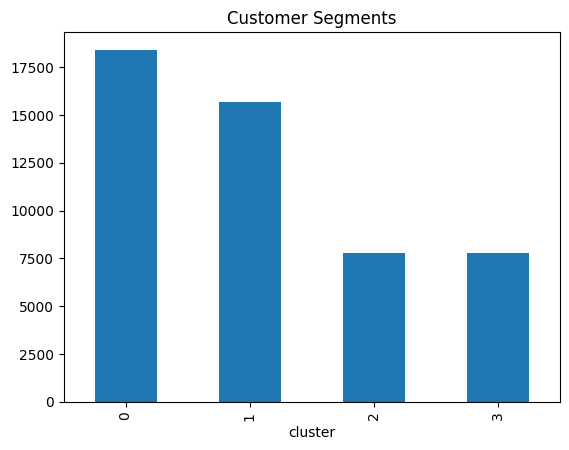

In [ ]:
rfm['cluster'].value_counts().plot(kind='bar', title='Customer Segments')


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

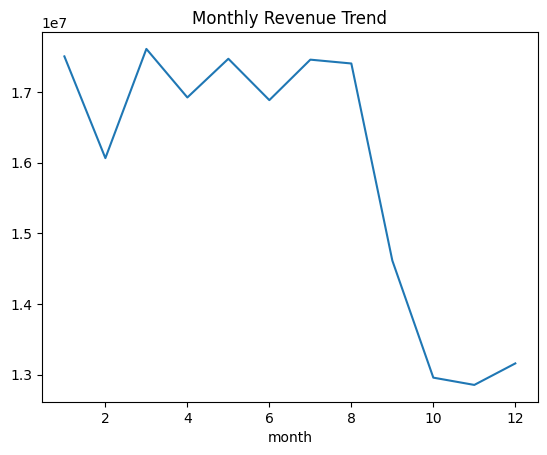

In [ ]:
df.groupby('month')['revenue'].sum().plot(title='Monthly Revenue Trend')


## Key Insights
- High-value customers contribute the most revenue.
- Certain clusters show churn risk due to low frequency and high recency.
- Monthly revenue shows seasonal purchasing trends.

## Recommendations for Alfido Tech
1. Launch loyalty programs for high-value customers.
2. Re-engage at-risk customers with targeted offers.
3. Personalize marketing campaigns using customer segments.
4. Improve customer experience for repeat purchases.
5. Monitor churn indicators to retain customers early.


## Conclusion

This analysis helped identify customer segments, purchasing patterns,
and churn risks. These insights can help Alfido Tech improve customer
retention, engagement, and overall business growth.
